# 經濟日報RSS-財經版解析
#### https://money.udn.com/

In [ ]:
# 套件安裝
!pip install requests
!pip install feedparser
!pip install lxml
!pip install jieba
!pip install wordcloud

# 解析 RSS

In [1]:
import feedparser
rss_url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"
rss_url = "https://money.udn.com/rssfeed/news/1001/5590/5607?ch=money"
newsFeed = feedparser.parse(rss_url)
newsFeed

{'bozo': True,
 'entries': [{'title': '中鋼7月稅前淨利90.8億元 月增9％',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5590/5607?ch=money',
    'value': '中鋼7月稅前淨利90.8億元 月增9％'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://money.udn.com/money/story/5607/5677395'}],
   'link': 'https://money.udn.com/money/story/5607/5677395',
   'published': 'Mon, 16 Aug 2021 15:07:27 +0800',
   'published_parsed': time.struct_time(tm_year=2021, tm_mon=8, tm_mday=16, tm_hour=7, tm_min=7, tm_sec=27, tm_wday=0, tm_yday=228, tm_isdst=0),
   'summary': '<p><img src="https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2021/08/06/realtime/13233509.jpg&amp;s=Y&amp;x=0&amp;y=0&amp;sw=1280&amp;sh=856&amp;sl=W&amp;fw=180&amp;exp=3600" /><p>中鋼（2002）結算7月合併營業收入418.8億元；合併營業利益81.5億元；自行結算合併稅前淨利90.8億元，月增９％...</p>',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://money.udn.com

# 查看每個 entry 的 title, url

In [2]:
i = 1
for e in newsFeed['entries']:
    title = e['title']
    link_url = e['links'][0]['href']
    print("%s, %s, %s"%(i, title, link_url))
    i = i + 1

1, 中鋼7月稅前淨利90.8億元 月增9％, https://money.udn.com/money/story/5607/5677395
2, 當沖降稅是否延長未定案  官員：若要延傾向低於5年, https://money.udn.com/money/story/5607/5677378
3, 聯亞新冠疫苗未通過EUA 子公司股價跳水式下跌, https://money.udn.com/money/story/5607/5677273
4, 鴻家軍財報解析／集團獲利誰最猛？上半年這五檔最厲害, https://money.udn.com/money/story/5607/5677114
5, 台股收跌123點失守半年線  留85點下影線, https://money.udn.com/money/story/5607/5677172
6, 台股開低走低 收跌123.34點, https://money.udn.com/money/story/5607/5677170
7, 台股下跌123點 跌破半年線支撐, https://money.udn.com/money/story/5607/5677128
8, 台股跌123點收16,858點 失守半年線, https://money.udn.com/money/story/5607/5677116
9, 大同上半年獲利轉正 盤中股價不領情、跌逾5%, https://money.udn.com/money/story/5607/5677102
10, 富采投控Q2轉盈 兩外資同步調高目標價、上看百元, https://money.udn.com/money/story/5607/5677089
11, 外資提款力道不減  今年累計賣超台股達5117億元, https://money.udn.com/money/story/5607/5677041
12, 內外資輪流升貨櫃股評等、目標價 三雄股價不同調, https://money.udn.com/money/story/5607/5676920
13, 當沖降稅優惠延長有望？ 金管會：財政部通盤考量, https://money.udn.com/money/story/5607/5676858
14, 台股盤中跌逾200點 寫近兩個月新低, https://mone

# 開始取得文章

In [4]:
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time
import random

In [6]:
#指定辭典檔
jieba.set_dictionary('jieba_data/dict.txt.big')

In [7]:
#設定 request header
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
my_headers = {
    'User-Agent': user_agent,
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-Language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "accept-encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "cache-control": "no-cache",
    "Accept-Charset": "UTF8,utf-8;q=0.7,*;q=0.7"
}

In [8]:
#爬文
each_article_text_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//*[@id="article_body"]//p')
        for a_part in article_elements:
            if type(a_part.text) is str:
                each_article_text_list.append(a_part.text.strip())
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
    all_article_text = ''.join(each_article_text_list)
all_article_text

https://money.udn.com/money/story/5607/5677395
sleep time: 6 sec
https://money.udn.com/money/story/5607/5677378
sleep time: 4 sec
https://money.udn.com/money/story/5607/5677273
sleep time: 9 sec
https://money.udn.com/money/story/5607/5677114
sleep time: 10 sec
https://money.udn.com/money/story/5607/5677172
sleep time: 6 sec
https://money.udn.com/money/story/5607/5677170
sleep time: 8 sec
https://money.udn.com/money/story/5607/5677128
sleep time: 6 sec
https://money.udn.com/money/story/5607/5677116
sleep time: 9 sec
https://money.udn.com/money/story/5607/5677102
sleep time: 5 sec
https://money.udn.com/money/story/5607/5677089
sleep time: 10 sec
https://money.udn.com/money/story/5607/5677041
sleep time: 7 sec
https://money.udn.com/money/story/5607/5676920
sleep time: 8 sec
https://money.udn.com/money/story/5607/5676858
sleep time: 3 sec
https://money.udn.com/money/story/5607/5676816
sleep time: 5 sec
https://money.udn.com/money/story/5607/5676793
sleep time: 6 sec
https://money.udn.com/m

'中鋼（2002）結算7月合併營業收入418.8億元；合併營業利益81.5億元；自行結算合併稅前淨利90.8億元，月增9％。中鋼表示，7月鋼鐵事業群銷售數量及單價上升且公司致力於降低成本，致營業利益增加；另7月業外轉投資鐵礦股利收入較高，整體合併稅前淨利較6月增加7.79億元。中鋼表示，7月碳鋼銷售量為800,114公噸；今年累計碳鋼銷售量為5,722,112公噸。當沖降稅再次成為市場關注點，外傳財經部會針對當沖降稅優惠延長取得共識，財政部官員今天表示，延長與不延長2套方案仍在討論中，目前未定案，若真要延長，則是建議縮短降稅年限。也就是說，財政部傾向低於5年。當沖證交稅稅率減半優惠將於年底到期，金管會4月下旬向財政部建議再延長5年，經過多月財政部遲未表態，上週市場傳出財政部傾向不延長，引發正反論戰，使研議進度再度受到關注。今天聯合報及經濟日報報導，金管會與財政部已達共識要延長當沖降稅，但具體延長期間與降稅幅度，仍待持續整合、討論。財政部高層表示，延長、不延長2套方案還都在手上，仍在評估當中，會根據政策目的、稅制公平性、對市場、投資人影響等面向列出利弊得失。財政部高層透露，延長版本初步規劃會在延長期間做調整，當沖降稅歷經兩次延長，從原先僅實施1年，又延長約3.8個月至今年底，若再延長5年前後合計近10年，幾乎到常態化，考量要合乎納保法及財政紀律法精神，傾向建議縮短年限。財政部官員表示，作為稅制主管機關，要思考的面向有許多，健全台股、增加交易量的政策工具很多，有稅制工具也有非稅制工具，如金融政策；2017年台股成交量低迷，在非稅制工具效果不彰狀態下，才動用降低當沖稅率來發揮點火效果。官員指出，經過4年多，台股重返榮景，交易量也擴大不少，此時是否還是只能單靠稅制工具來救市，有沒有非稅制的工具可發揮替代效果，當初的點火工具存在的必要性，站在稅的立場一定要檢討，才不違背納稅者權利保護法、財政紀律法的立法意旨，租稅優惠不得過度，也應有適當期限。在當沖降稅減半狀態下，官員說，玩當沖比起一般交易稅負更低，目前台灣證所稅也是停徵狀態，要去考量延長必要性及公平性的平衡，並思考是否過度鼓勵投機；可理解近期外界的正反討論，近期將向行政院提出延長與不延長2個評估方案，交由行政院拍板定案，並趕在立法院下個會期啟動修法工作。聯亞生技新冠疫苗在6月底公布二期期中報告，並向食藥署遞件申請緊急使用授權

In [9]:
#分詞
seg_words_list = jieba.lcut(all_article_text)
seg_words_list

Building prefix dict from C:\Users\KinJoe\test\jieba_data\dict.txt.big ...
Dumping model to file cache C:\Users\KinJoe\AppData\Local\Temp\jieba.u220407064f1b6f1baf022922912c418a.cache
Loading model cost 1.145 seconds.
Prefix dict has been built successfully.


['中',
 '鋼',
 '（',
 '2002',
 '）',
 '結算',
 '7',
 '月',
 '合併',
 '營業',
 '收入',
 '418.8',
 '億元',
 '；',
 '合併',
 '營業',
 '利益',
 '81.5',
 '億元',
 '；',
 '自行',
 '結算',
 '合併',
 '稅前',
 '淨利',
 '90.8',
 '億元',
 '，',
 '月',
 '增',
 '9',
 '％',
 '。',
 '中',
 '鋼',
 '表示',
 '，',
 '7',
 '月',
 '鋼鐵',
 '事業',
 '群',
 '銷售',
 '數量',
 '及',
 '單價',
 '上升',
 '且',
 '公司',
 '致力於',
 '降低成本',
 '，',
 '致',
 '營業',
 '利益',
 '增加',
 '；',
 '另',
 '7',
 '月業外',
 '轉投資',
 '鐵礦',
 '股利收入',
 '較',
 '高',
 '，',
 '整體',
 '合併',
 '稅前',
 '淨利',
 '較',
 '6',
 '月',
 '增加',
 '7.79',
 '億元',
 '。',
 '中',
 '鋼',
 '表示',
 '，',
 '7',
 '月',
 '碳鋼',
 '銷售量',
 '為',
 '800',
 ',',
 '114',
 '公噸',
 '；',
 '今年',
 '累計',
 '碳鋼',
 '銷售量',
 '為',
 '5',
 ',',
 '722',
 ',',
 '112',
 '公噸',
 '。',
 '當',
 '沖',
 '降稅',
 '再次',
 '成為',
 '市場',
 '關注點',
 '，',
 '外傳',
 '財經部',
 '會',
 '針對',
 '當',
 '沖',
 '降稅',
 '優惠',
 '延長',
 '取得',
 '共識',
 '，',
 '財政部',
 '官員',
 '今天',
 '表示',
 '，',
 '延長',
 '與',
 '不',
 '延長',
 '2',
 '套',
 '方案',
 '仍',
 '在',
 '討論',
 '中',
 '，',
 '目前',
 '未',
 '定案',
 '，',
 '若真',
 '要',
 '延長',
 '，',
 '則是

In [10]:
#stop word
with open(file='jieba_data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '的',
 '了',
 '和',
 '是',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '一個',
 '沒有',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '是否',
 '(',
 ')',
 '[',
 ']',
 '《',
 '》',
 '；',
 '『',
 '』',
 '：',
 ' ',
 '’',
 '（',
 '）',
 '、',
 '」',
 '「',
 '。',
 '，',
 '在',
 '他',
 '日',
 '對',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '月',
 '股',
 '等',
 '在',
 '後',
 '季',
 '第',
 '高',
 '並',
 '也',
 '將',
 '點',
 '但',
 '10',
 '仍',
 '為',
 '%',
 '元',
 '有',
 '億元',
 '上',
 '會',
 '可',
 '公司',
 '前',
 '目前',
 '']

In [11]:
#分詞
seg_stop_words_list = []
seg_words_list = jieba.lcut(all_article_text)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
seg_stop_words_list

['中',
 '鋼',
 '2002',
 '結算',
 '合併',
 '營業',
 '收入',
 '418.8',
 '合併',
 '營業',
 '利益',
 '81.5',
 '自行',
 '結算',
 '合併',
 '稅前',
 '淨利',
 '90.8',
 '增',
 '％',
 '中',
 '鋼',
 '表示',
 '鋼鐵',
 '事業',
 '群',
 '銷售',
 '數量',
 '單價',
 '上升',
 '且',
 '致力於',
 '降低成本',
 '致',
 '營業',
 '利益',
 '增加',
 '另',
 '月業外',
 '轉投資',
 '鐵礦',
 '股利收入',
 '較',
 '整體',
 '合併',
 '稅前',
 '淨利',
 '較',
 '增加',
 '7.79',
 '中',
 '鋼',
 '表示',
 '碳鋼',
 '銷售量',
 '800',
 ',',
 '114',
 '公噸',
 '今年',
 '累計',
 '碳鋼',
 '銷售量',
 ',',
 '722',
 ',',
 '112',
 '公噸',
 '當',
 '沖',
 '降稅',
 '再次',
 '成為',
 '市場',
 '關注點',
 '外傳',
 '財經部',
 '針對',
 '當',
 '沖',
 '降稅',
 '優惠',
 '延長',
 '取得',
 '共識',
 '財政部',
 '官員',
 '今天',
 '表示',
 '延長',
 '不',
 '延長',
 '套',
 '方案',
 '討論',
 '中',
 '未',
 '定案',
 '若真',
 '要',
 '延長',
 '則是',
 '建議',
 '縮短',
 '降稅',
 '年限',
 '也就是說',
 '財政部',
 '傾向',
 '低於',
 '年',
 '當',
 '沖',
 '證交稅',
 '稅率',
 '減半',
 '優惠',
 '將於',
 '年底',
 '到期',
 '金管會',
 '下旬',
 '向',
 '財政部',
 '建議',
 '再',
 '延長',
 '年',
 '經過',
 '多月',
 '財政部',
 '遲未',
 '表態',
 '上週',
 '市場',
 '傳出',
 '財政部',
 '傾向',
 '不',
 '延長',
 '引發',
 '正反',
 '論戰

# 載入繪圖相關的 library

In [12]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


## 繪製文字雲 ( wordcloud.generate )

In [13]:
# wordcloud.generate 參數是吃文字內容，以空白為文字區隔
seg_words = ' '.join(seg_words_list)
#seg_words

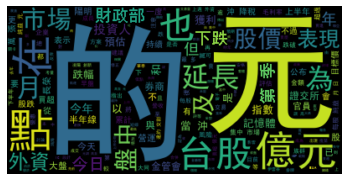

In [15]:
#不同字型
wordcloud = WordCloud(font_path='fonts/SimHei.ttf').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

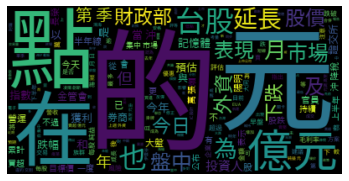

In [16]:
#不同字型
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 繪製文字雲 ( wordcloud.generate_from_frequencies )

In [17]:
# https://docs.python.org/zh-tw/3/library/collections.html
# 準備一個沒有經過stop word 處理的 counter
from collections import Counter
seg_counter = Counter(seg_words_list)
seg_counter

Counter({'中': 8,
         '鋼': 3,
         '（': 38,
         '2002': 1,
         '）': 34,
         '結算': 2,
         '7': 9,
         '月': 26,
         '合併': 5,
         '營業': 3,
         '收入': 1,
         '418.8': 1,
         '億元': 38,
         '；': 32,
         '利益': 2,
         '81.5': 1,
         '自行': 1,
         '稅前': 2,
         '淨利': 2,
         '90.8': 1,
         '，': 480,
         '增': 1,
         '9': 3,
         '％': 1,
         '。': 108,
         '表示': 9,
         '鋼鐵': 4,
         '事業': 4,
         '群': 1,
         '銷售': 1,
         '數量': 2,
         '及': 17,
         '單價': 1,
         '上升': 3,
         '且': 6,
         '公司': 7,
         '致力於': 1,
         '降低成本': 1,
         '致': 1,
         '增加': 5,
         '另': 3,
         '月業外': 1,
         '轉投資': 1,
         '鐵礦': 1,
         '股利收入': 1,
         '較': 6,
         '高': 9,
         '整體': 4,
         '6': 13,
         '7.79': 1,
         '碳鋼': 2,
         '銷售量': 2,
         '為': 22,
         '800': 1,
         ',': 15,

In [18]:
# 準備一個有經過stop word 處理的 counter
from collections import Counter
seg_stop_counter = Counter(seg_stop_words_list)
#seg_stop_counter

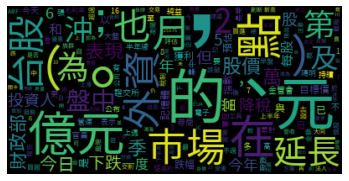

In [19]:
#沒有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

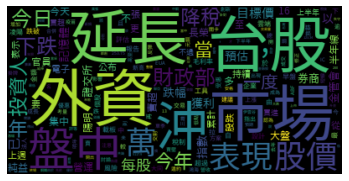

In [20]:
#有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_stop_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### [其他] 用dataframe 處理數據

In [21]:
seg_df = pd.DataFrame(seg_words_list, columns=['seg_word'])
seg_df

,seg_word
0,中
1,鋼
2,（
3,2002
4,）
...,...
4818,，
4819,基本面
4820,轉機
4821,強


In [22]:
seg_df['count'] = 1
seg_freq_df = seg_df.groupby('seg_word').sum()
seg_freq_df

,count
seg_word,
,16
(,2
),2
",",15
-,7
...,...
）,34
，,480
：,5


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20491 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38651 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20806 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20808 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26524 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24040 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25110 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25165 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27298 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21490 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32147 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32173 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24613 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36879 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36889 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36899 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12300 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12301 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20491 missing from current fon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20171 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20173 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 23660 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24453 missing from current fon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 36008 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21029 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26512 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24107 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27490 missing from current fon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24341 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21576 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21644 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21807 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 37434 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21855 missing from current fon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 28136 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 23560 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 23562 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32763 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 23578 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 23637 missing from current fon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25239 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25260 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25293 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26495 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25299 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25302 missing from current fon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26356 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26366 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26367 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27794 missing from current fon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24535 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31185 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 28961 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 28966 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 29105 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38272 missing from current fon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32025 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32033 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32340 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32406 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32066 missing from current fon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25014 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20633 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20272 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32026 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35442 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35469 missing from current fon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 40845 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65285 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65306 missing from current fon

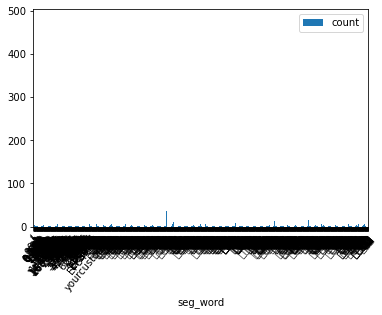

In [23]:
seg_df.groupby('seg_word').sum().plot.bar()
plt.xticks(rotation=50)
plt.show()